<a href="https://colab.research.google.com/github/nureeee/Machhine-Learning/blob/main/210611_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀 (Regression) 예측
수치형 값을 예측(y의 값이 연속된 수치로 표현됨(실수))

In [3]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.datasets import load_boston


In [5]:
data = load_boston()

In [6]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
df = pd.DataFrame(
    data['data'],
    columns=data['feature_names']    
)

In [8]:
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


데이터 분할

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(
    df.drop('MEDV', axis=1),
    df['MEDV']
)

x_train.shape, x_valid.shape

((379, 13), (127, 13))

In [10]:
y_train.shape, y_valid.shape

((379,), (127,))

# 평가 지표 만ㄴ들기
**MSE (Mean Squared Error)**
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i-t_i)^2
$$
예측값($\hat{y}$)과 실제값($t$)의 차이에 대한 **제곱**에 대하여 평균을 낸 값

**MAE(Mean Absolute Error)**
$$
MAE = \frac{1}{n}\sum_{i=1}^{n}\left | \hat{y}_i - t_i \right |
$$

예측값($\hat{y}$)과 실제값($t$)의 차이에 대한 **절대값**에 대하여 평균을 낸 값

**RMSE ( Root Mean Squared Error)**
$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i-t_i)^2}
$$

$MSE$에 root를 씌운 값으로써 실제 오차의 평균이라고 봐도 무방

In [11]:
pred = np.array([3.0, 4.0, 5.3])
actual = np.array([1.0, 3.8, 6.8])

In [12]:
def my_mean_squared_error(y, t):
    return ((y - t)**2).mean()
    

In [13]:
my_mean_squared_error(pred, actual)

2.0966666666666667

mae 구현 (절댓값 : np.abs() )

In [14]:
def my_mean_absolute_error(y, t):
    return np.abs(y - t).mean()

In [15]:
my_mean_absolute_error(pred, actual)

1.2333333333333334

rmse 구현

In [16]:
def my_root_mean_squared_error(y, t):
    return np.sqrt(my_mean_squared_error(y, t))

In [17]:
my_root_mean_squared_error(pred, actual)

1.4479871085982314

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
my_predictions = {}
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)
    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()
def mse_eval(name_, pred, actual):
    global predictions
    global colors
    plot_predictions(name_, pred, actual)
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    length = len(df)
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    plt.show()
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

# LinearRegression
선형회귀


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression(n_jobs=-1) # n_jobs : 사용할 CPU 코어의 개수. -1이면 CPU의 모든 코어를 활용

model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [22]:
pred = model.predict(x_valid)

시각화

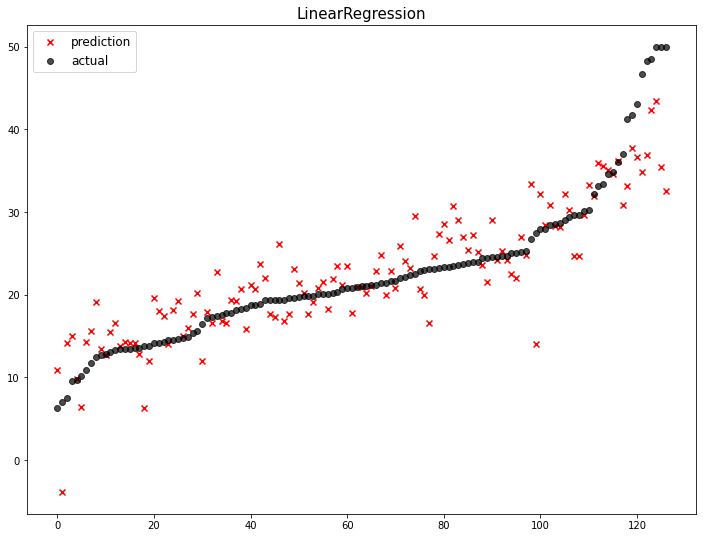

              model       mse
0  LinearRegression  19.15222


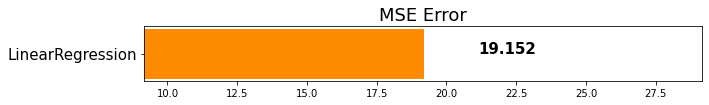

In [23]:
mse_eval('LinearRegression', pred, y_valid)
# feature가 13개 있어서 13차원이다.

결정 계수 지표 ($R^2$)
- 분류에서의 score에 해당

In [24]:
# 이렇게 해서 나온 값이 R제곱이다
model.score(x_valid, y_valid)

0.7676568117974352

In [25]:
# 트레인이 높고 테스트가 낮기 때문에 과대적합으로 의심
model.score(x_train, y_train)

0.7300859510651032

## LinnearRegression의 수식
제대로 알아랴 되는 내용!!!!!!!!!!!!
* 기울기(w), 편향(b)
* 기울기는 다른 말로 가중치라고 한다

## 가중치의 의미
* 입력되고 있는 데이터($x$)들의 각각의 중요도를 판단하는 것
 - 어떠한 중요도 : 예측값($\hat{y}$)에 얼마나 많이 영향을 끼칠 것인가
* 가중치의 절댓값이 커지면 예측값에 영향을 많이 미친다.
 - ->모델이 복잡해 진다.
* 가중치의 절뎃값이 작아지면 예측값에 영향을절 미친다.
 - 모델이 단순해진다


# LinearRegression은 ㄴ가중치를 조절할 반법이 없다
## 규제($\alpha$ - Regularization)를 사용하는 모델을 사용해서 가중치를 조절
* $\alpha$ : **penalty**부여 매개변수 (또는 람다($\lambda$))

- 패널티가 늘어나면 가중치가 작아진다
- 패널티가 줄어들면 가중치가 커진다

## 규제방식
* **L2 규제 (L2 Regularization)**
    - 각 가중치의 제곱의 합에 규제 강도인 $\alpha$를 곱하여 오차를 더한다
    - $\alpha$를 크게하면 가중치가 더 많이 감소(규제를 더 중요하게 생각하겠다)
    - $\alpha$를 작게하면 가중치가 증가 (규제를 중요하게 생각하지 않음)
    
* **L1 규제 (L1 Regularization)**
    - 가중치의 합을 더한 값에 규제 강도인 ($\alpha$)를 곱하여 오차에 더한다
    - 어떤 가중치는 실제 0이 되어버린다. 즉 모델에서 완전히 제외되는 특성이 생긴다.
        * 모델이 특성을 선택(feature selection)

**L2 규제가 L1규제에 비해 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**
$$
 E = MSE + \alpha \sum w^2
$$

**라쏘(Lasso) - L1 규제** 


In [26]:
from sklearn.linear_model import Ridge

In [27]:
# 값이 커질 수록 규제 - 가중치가 줄어든다
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001 ] # 로그 스케일로 조절하는게 좋다(10배 또는1/10로)

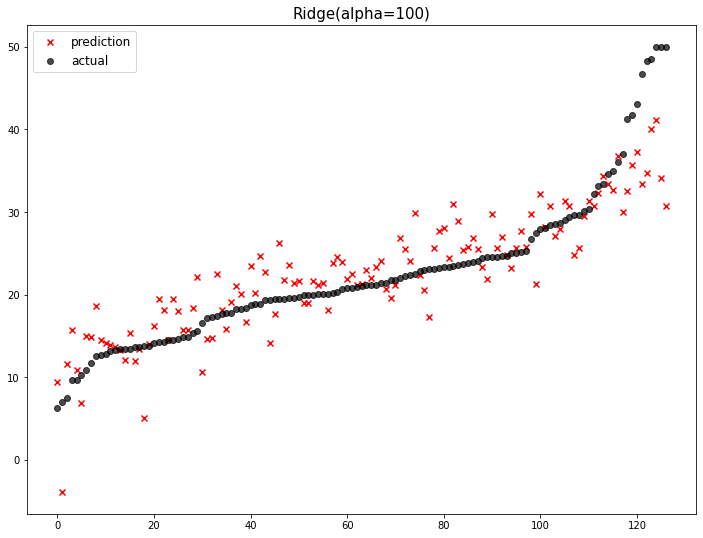

              model        mse
0  Ridge(alpha=100)  20.719235
1  LinearRegression  19.152220


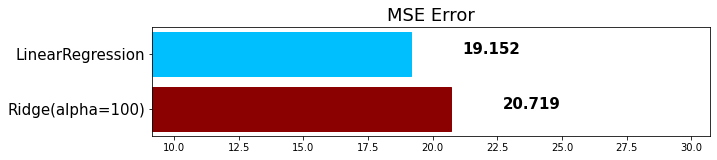

Ridge(alpha=100) Train score : 0.7003261085633088 / valid score : 0.748646729177519


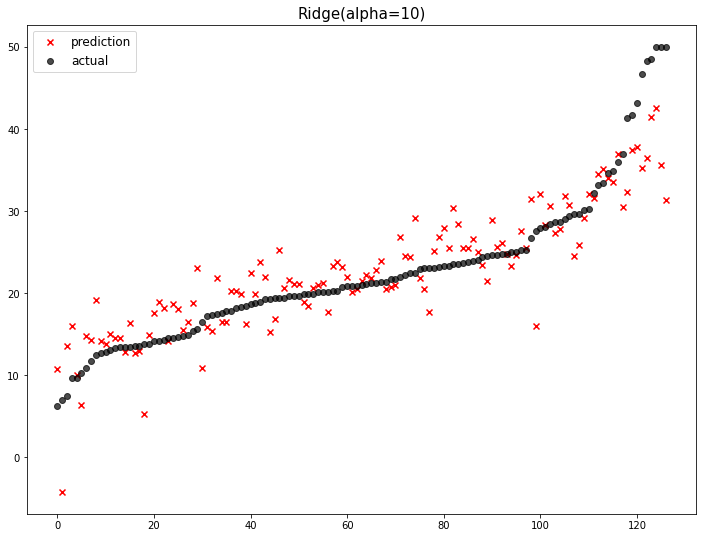

              model        mse
0  Ridge(alpha=100)  20.719235
1  LinearRegression  19.152220
2   Ridge(alpha=10)  19.041955


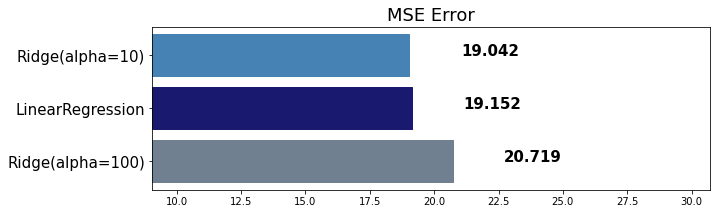

Ridge(alpha=10) Train score : 0.717208323239668 / valid score : 0.7689944820182604


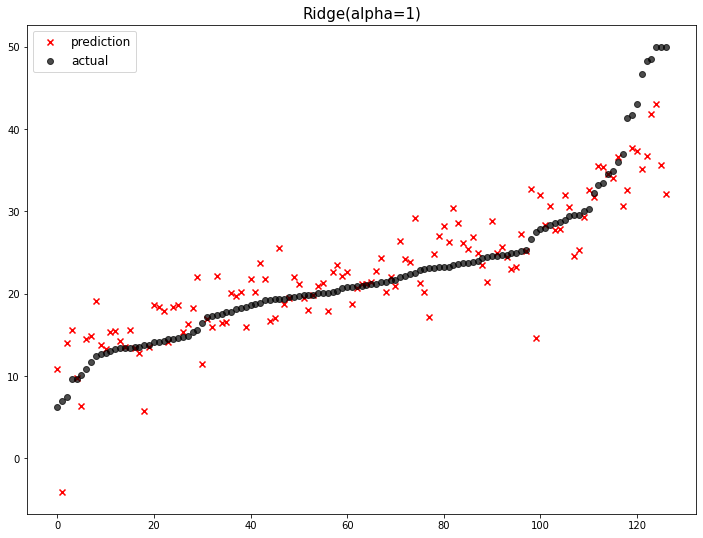

              model        mse
0  Ridge(alpha=100)  20.719235
1  LinearRegression  19.152220
2   Ridge(alpha=10)  19.041955
3    Ridge(alpha=1)  18.745782


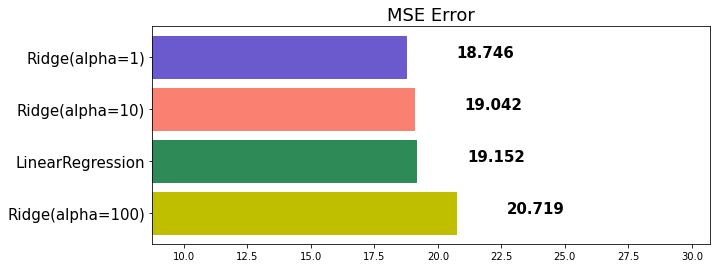

Ridge(alpha=1) Train score : 0.7267101829946814 / valid score : 0.7725874739954564


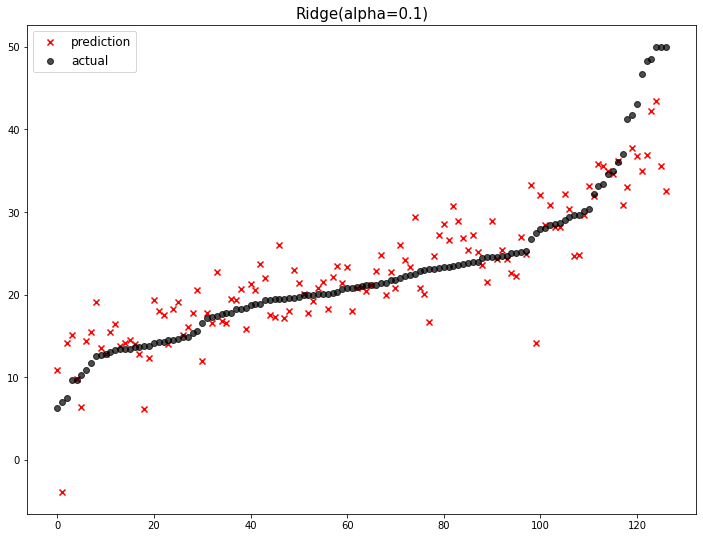

              model        mse
0  Ridge(alpha=100)  20.719235
1  LinearRegression  19.152220
2   Ridge(alpha=10)  19.041955
3  Ridge(alpha=0.1)  19.029929
4    Ridge(alpha=1)  18.745782


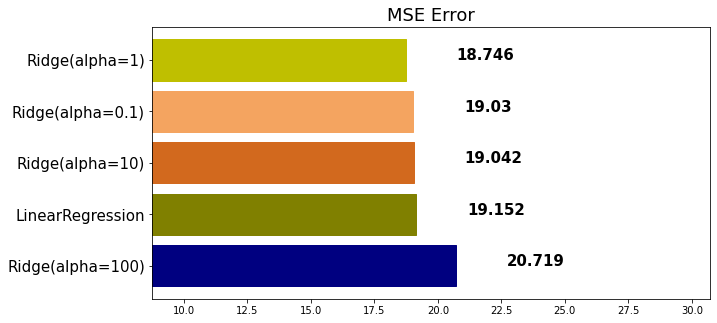

Ridge(alpha=0.1) Train score : 0.7299826661155806 / valid score : 0.7691403708164346


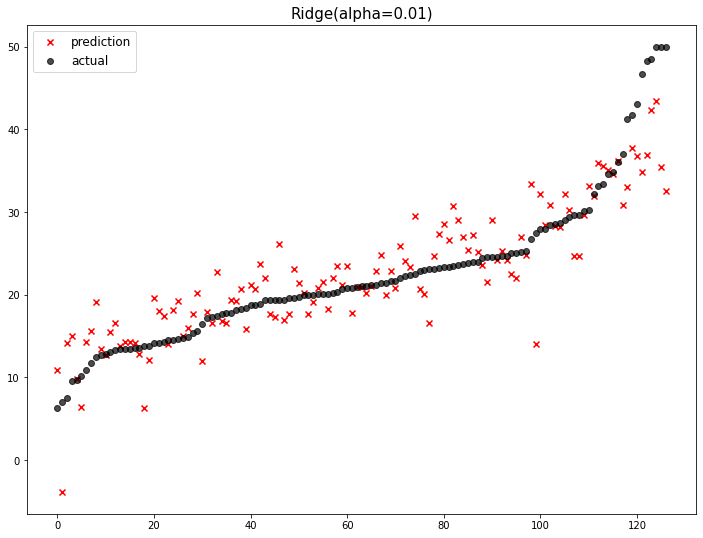

               model        mse
0   Ridge(alpha=100)  20.719235
1   LinearRegression  19.152220
2  Ridge(alpha=0.01)  19.137950
3    Ridge(alpha=10)  19.041955
4   Ridge(alpha=0.1)  19.029929
5     Ridge(alpha=1)  18.745782


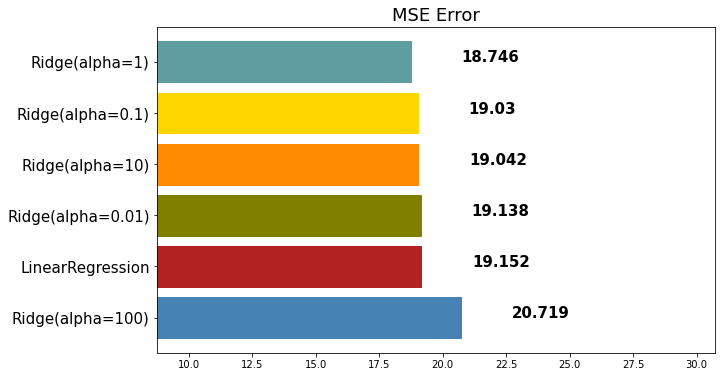

Ridge(alpha=0.01) Train score : 0.7300847437799974 / valid score : 0.7678299254775238


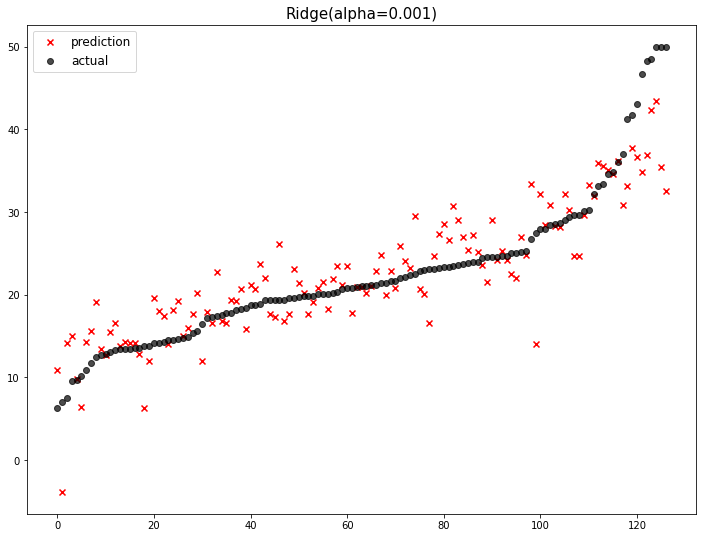

                model        mse
0    Ridge(alpha=100)  20.719235
1    LinearRegression  19.152220
2  Ridge(alpha=0.001)  19.150770
3   Ridge(alpha=0.01)  19.137950
4     Ridge(alpha=10)  19.041955
5    Ridge(alpha=0.1)  19.029929
6      Ridge(alpha=1)  18.745782


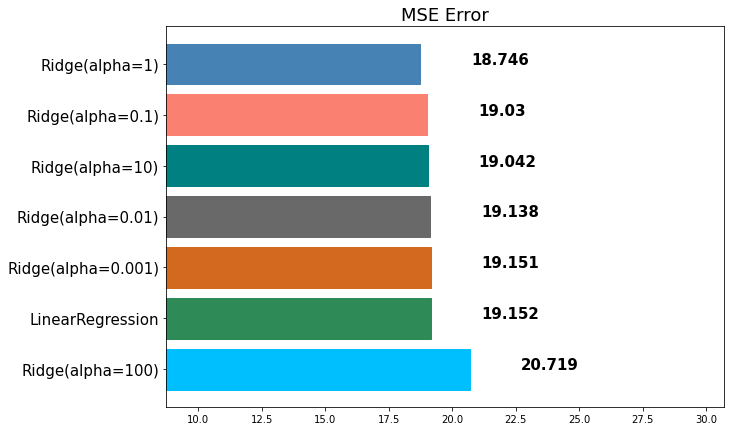

Ridge(alpha=0.001) Train score : 0.7300859387938647 / valid score : 0.7676744046169295


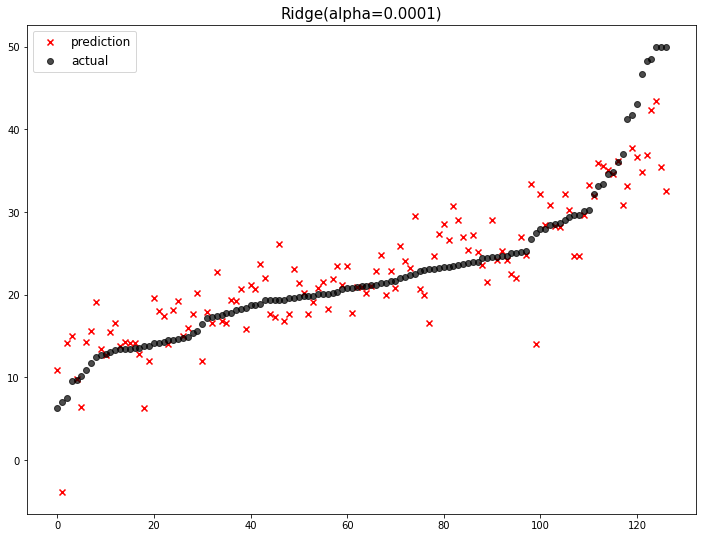

                 model        mse
0     Ridge(alpha=100)  20.719235
1     LinearRegression  19.152220
2  Ridge(alpha=0.0001)  19.152075
3   Ridge(alpha=0.001)  19.150770
4    Ridge(alpha=0.01)  19.137950
5      Ridge(alpha=10)  19.041955
6     Ridge(alpha=0.1)  19.029929
7       Ridge(alpha=1)  18.745782


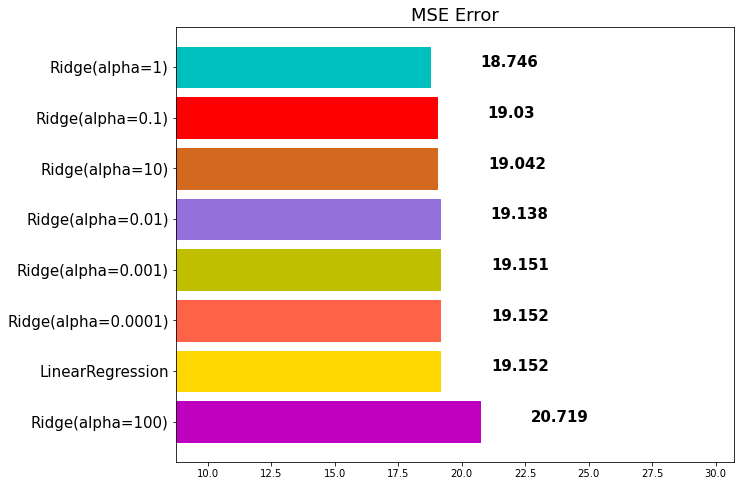

Ridge(alpha=0.0001) Train score : 0.7300859509421898 / valid score : 0.7676585739319122


In [28]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)

    pred = ridge.predict(x_valid)
    valid_score = ridge.score(x_valid, y_valid)
    train_score = ridge.score(x_train, y_train)
    
    mse_eval(f'Ridge(alpha={alpha})', pred, y_valid )
    print(f'Ridge(alpha={alpha}) Train score : {train_score} / valid score : {valid_score}')

ridge에 의해서 설정된 가중치 확인하기

In [29]:
ridge.coef_ # 각 feature의 가중치를 볼 수 있음

array([-1.23331022e-01,  5.29549486e-02,  2.48785550e-02,  2.88737203e+00,
       -2.08285526e+01,  3.73892593e+00,  6.87601087e-03, -1.47959661e+00,
        2.99663041e-01, -1.16016185e-02, -9.46366366e-01,  6.57162246e-03,
       -5.08597546e-01])

In [30]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

시각화

In [31]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns = ['feature', 'coef']

    coef_df = coef_df.sort_values(by='coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])

    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

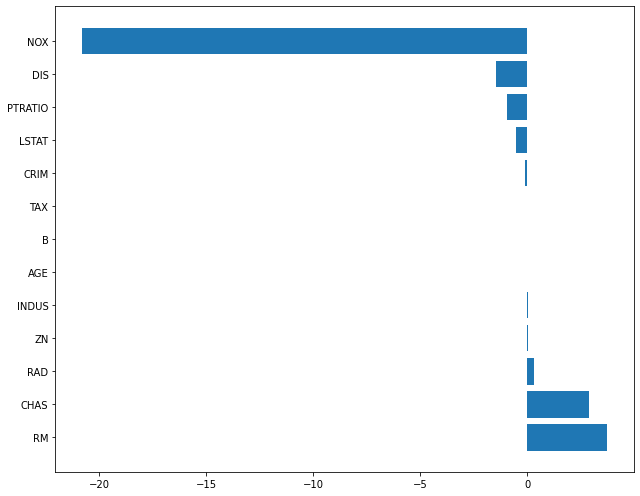

In [32]:
plot_coef(x_train.columns, ridge.coef_)

In [33]:
ridge100 = Ridge(alpha=100)
ridge100.fit(x_train, y_train)
ridge_pred_100 = ridge100.predict(x_valid)

ridge001 = Ridge(alpha=0.001)
ridge001.fit(x_train, y_train)
ridge_pred_001 = ridge001.predict(x_valid)

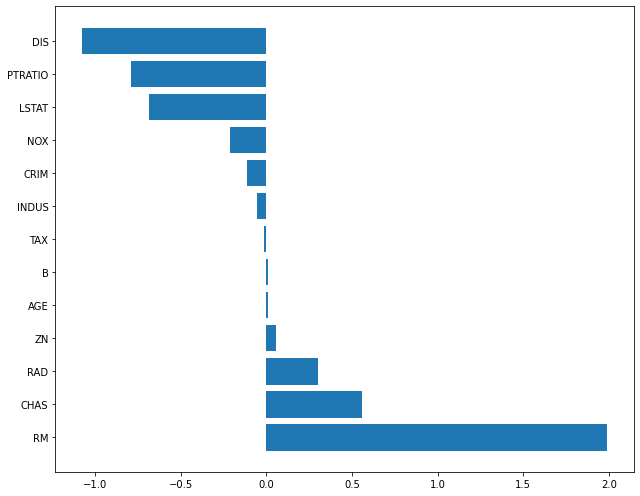

In [34]:
plot_coef(x_train.columns, ridge100.coef_)

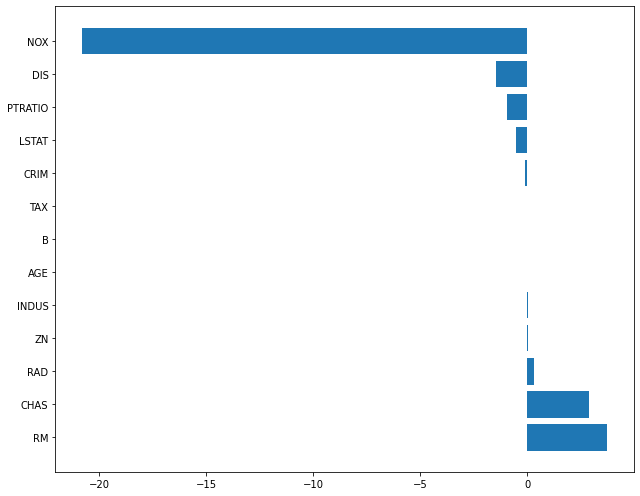

In [35]:
plot_coef(x_train.columns, ridge001.coef_)

In [36]:
from sklearn.linear_model import Lasso

In [37]:
alpha = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

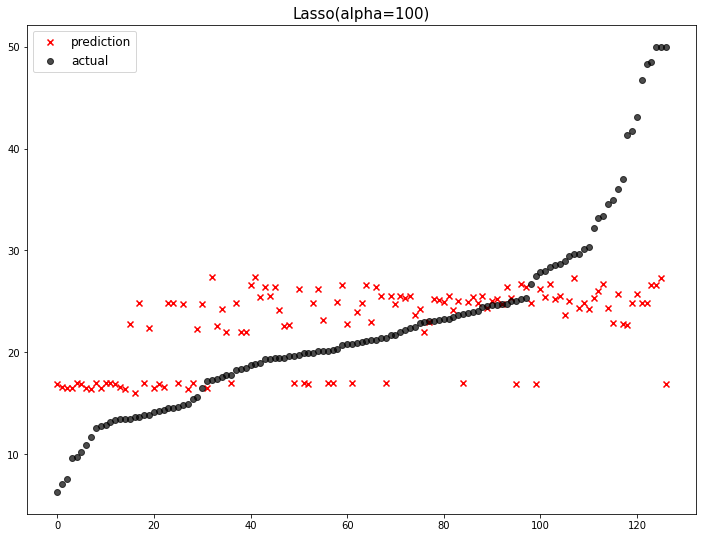

                 model        mse
0     Lasso(alpha=100)  63.832240
1     Ridge(alpha=100)  20.719235
2     LinearRegression  19.152220
3  Ridge(alpha=0.0001)  19.152075
4   Ridge(alpha=0.001)  19.150770
5    Ridge(alpha=0.01)  19.137950
6      Ridge(alpha=10)  19.041955
7     Ridge(alpha=0.1)  19.029929
8       Ridge(alpha=1)  18.745782


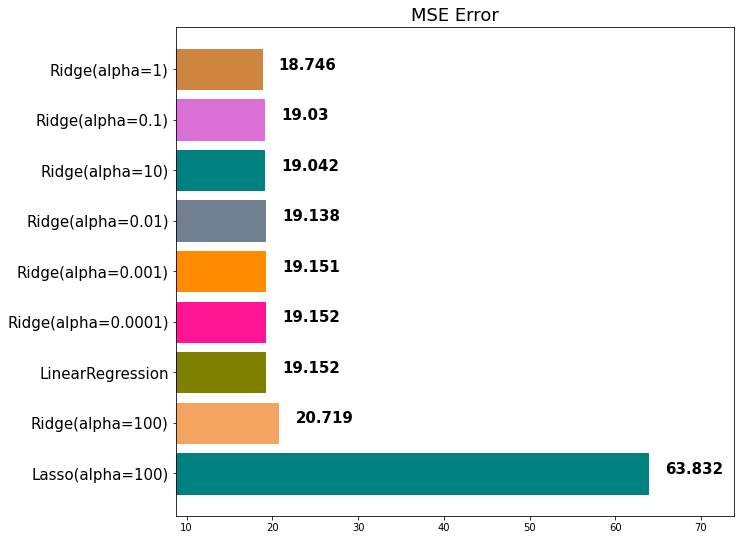

Lasso(alpha=100 Train score : 0.21694994108441434 Valid score : 0.22562575172929814


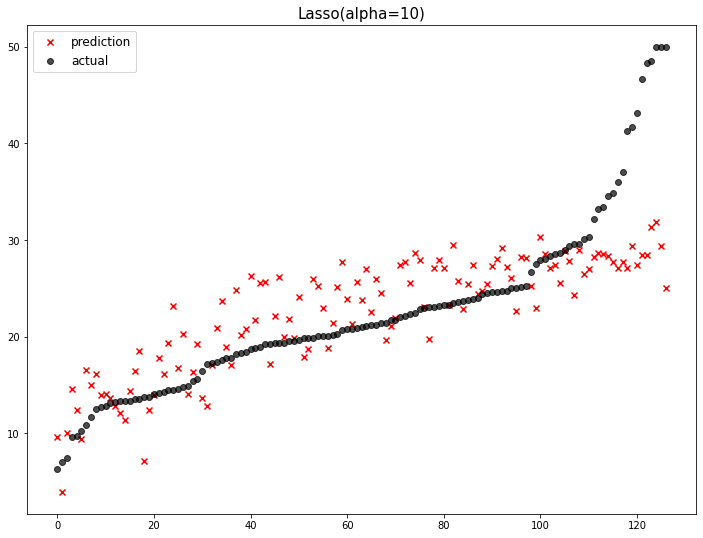

                 model        mse
0     Lasso(alpha=100)  63.832240
1      Lasso(alpha=10)  37.241495
2     Ridge(alpha=100)  20.719235
3     LinearRegression  19.152220
4  Ridge(alpha=0.0001)  19.152075
5   Ridge(alpha=0.001)  19.150770
6    Ridge(alpha=0.01)  19.137950
7      Ridge(alpha=10)  19.041955
8     Ridge(alpha=0.1)  19.029929
9       Ridge(alpha=1)  18.745782


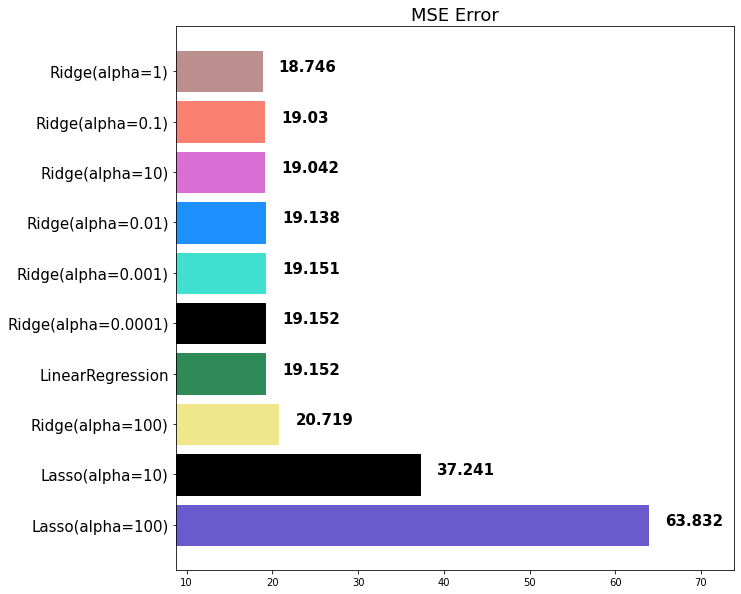

Lasso(alpha=10 Train score : 0.5180961166665371 Valid score : 0.5482086443179414


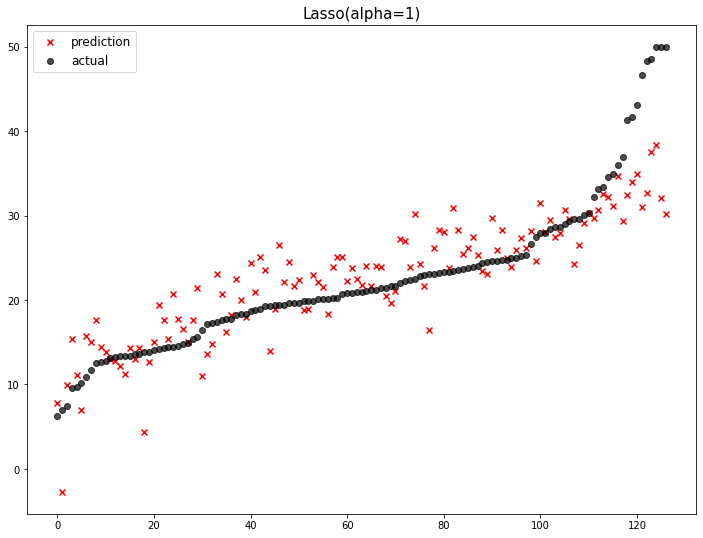

                  model        mse
0      Lasso(alpha=100)  63.832240
1       Lasso(alpha=10)  37.241495
2        Lasso(alpha=1)  24.339263
3      Ridge(alpha=100)  20.719235
4      LinearRegression  19.152220
5   Ridge(alpha=0.0001)  19.152075
6    Ridge(alpha=0.001)  19.150770
7     Ridge(alpha=0.01)  19.137950
8       Ridge(alpha=10)  19.041955
9      Ridge(alpha=0.1)  19.029929
10       Ridge(alpha=1)  18.745782


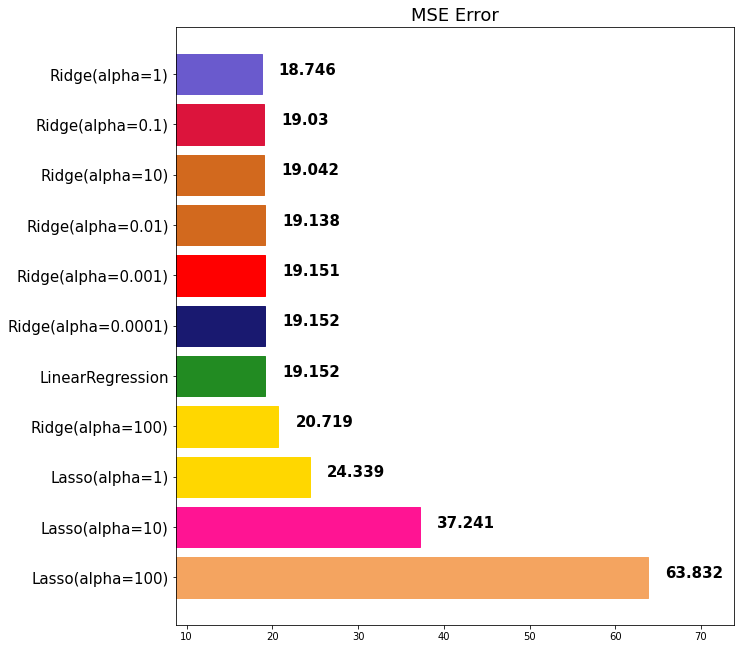

Lasso(alpha=1 Train score : 0.6675859554340109 Valid score : 0.7047307349682241


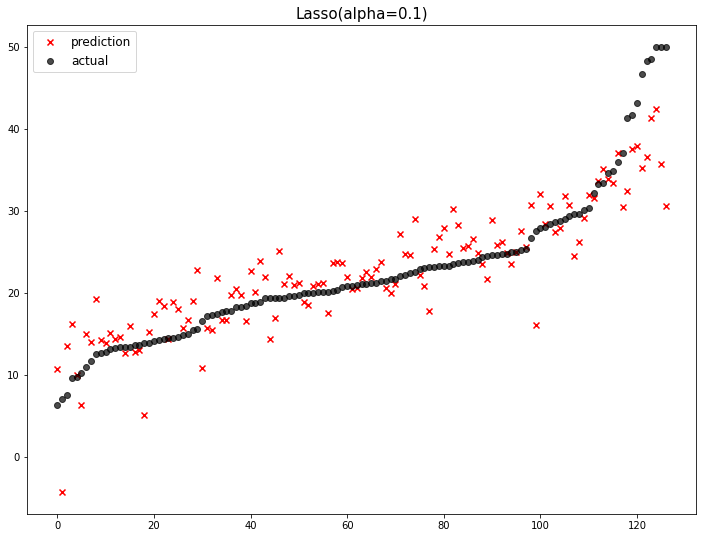

                  model        mse
0      Lasso(alpha=100)  63.832240
1       Lasso(alpha=10)  37.241495
2        Lasso(alpha=1)  24.339263
3      Ridge(alpha=100)  20.719235
4      Lasso(alpha=0.1)  19.260224
5      LinearRegression  19.152220
6   Ridge(alpha=0.0001)  19.152075
7    Ridge(alpha=0.001)  19.150770
8     Ridge(alpha=0.01)  19.137950
9       Ridge(alpha=10)  19.041955
10     Ridge(alpha=0.1)  19.029929
11       Ridge(alpha=1)  18.745782


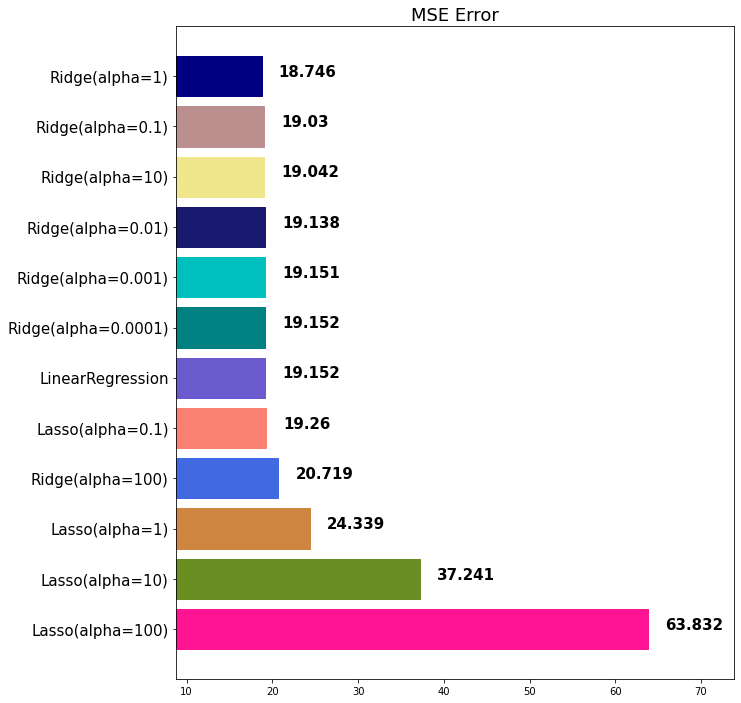

Lasso(alpha=0.1 Train score : 0.7130535501639805 Valid score : 0.7663465708754632


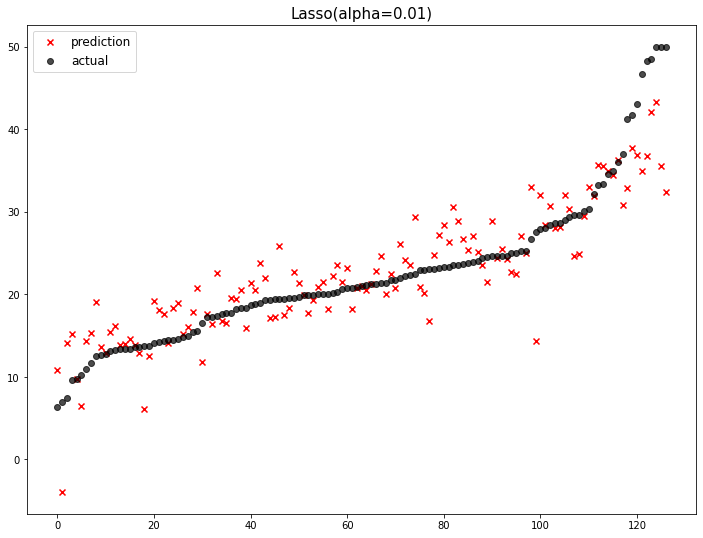

                  model        mse
0      Lasso(alpha=100)  63.832240
1       Lasso(alpha=10)  37.241495
2        Lasso(alpha=1)  24.339263
3      Ridge(alpha=100)  20.719235
4      Lasso(alpha=0.1)  19.260224
5      LinearRegression  19.152220
6   Ridge(alpha=0.0001)  19.152075
7    Ridge(alpha=0.001)  19.150770
8     Ridge(alpha=0.01)  19.137950
9       Ridge(alpha=10)  19.041955
10     Ridge(alpha=0.1)  19.029929
11    Lasso(alpha=0.01)  18.922254
12       Ridge(alpha=1)  18.745782


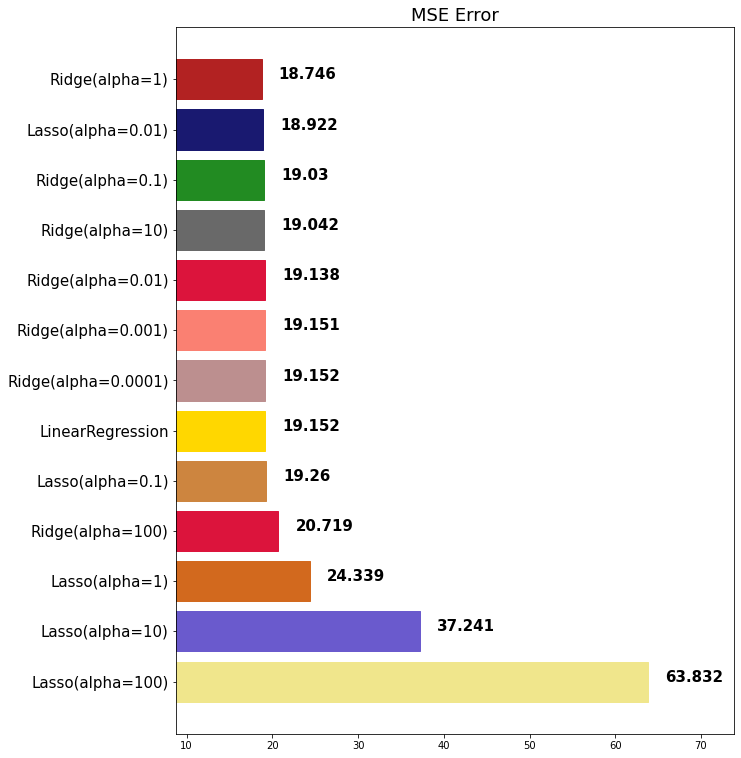

Lasso(alpha=0.01 Train score : 0.7296336250549786 Valid score : 0.7704466261240146


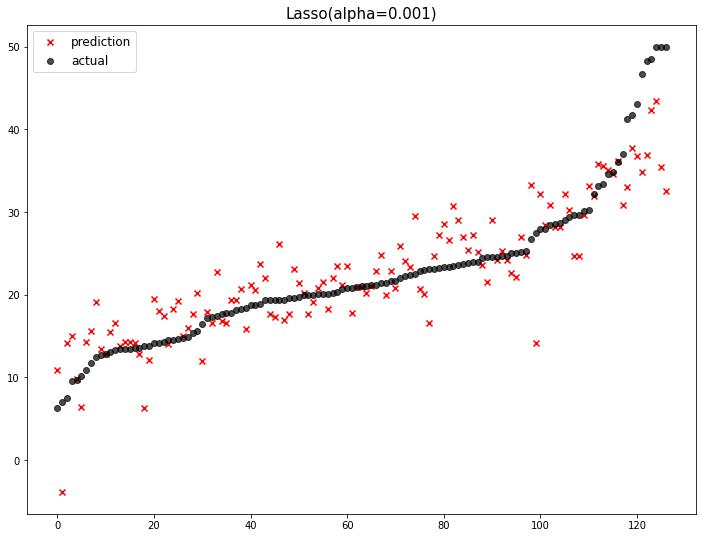

                  model        mse
0      Lasso(alpha=100)  63.832240
1       Lasso(alpha=10)  37.241495
2        Lasso(alpha=1)  24.339263
3      Ridge(alpha=100)  20.719235
4      Lasso(alpha=0.1)  19.260224
5      LinearRegression  19.152220
6   Ridge(alpha=0.0001)  19.152075
7    Ridge(alpha=0.001)  19.150770
8     Ridge(alpha=0.01)  19.137950
9    Lasso(alpha=0.001)  19.124950
10      Ridge(alpha=10)  19.041955
11     Ridge(alpha=0.1)  19.029929
12    Lasso(alpha=0.01)  18.922254
13       Ridge(alpha=1)  18.745782


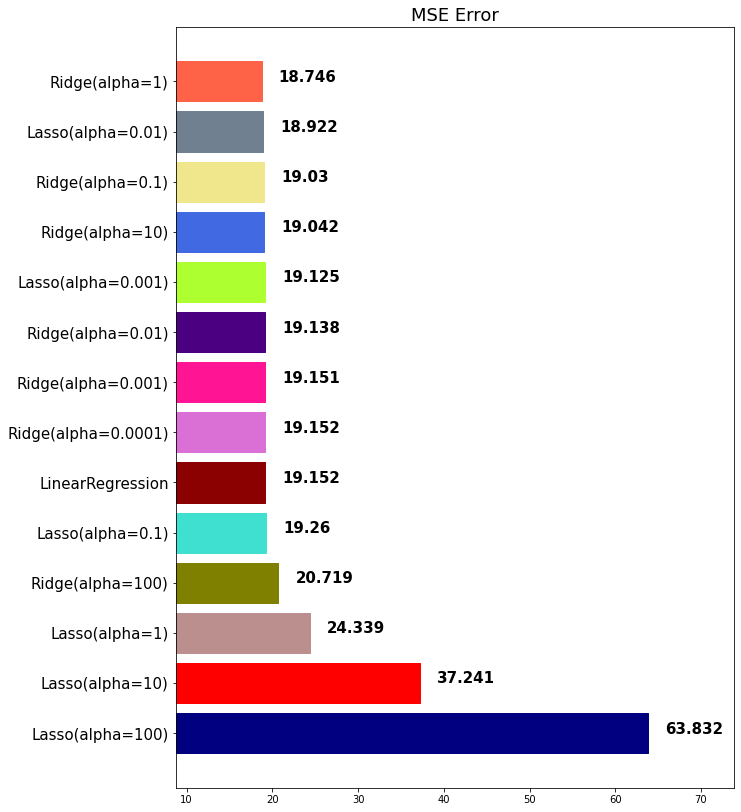

Lasso(alpha=0.001 Train score : 0.7300814261900197 Valid score : 0.7679876409359448


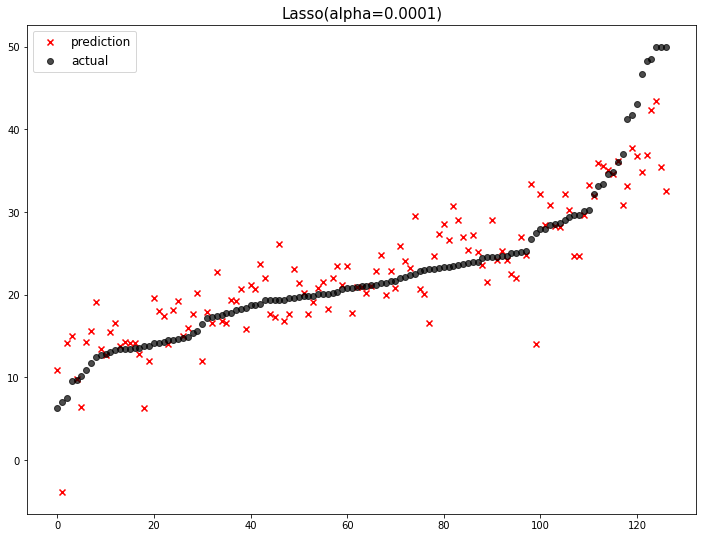

                  model        mse
0      Lasso(alpha=100)  63.832240
1       Lasso(alpha=10)  37.241495
2        Lasso(alpha=1)  24.339263
3      Ridge(alpha=100)  20.719235
4      Lasso(alpha=0.1)  19.260224
5      LinearRegression  19.152220
6   Ridge(alpha=0.0001)  19.152075
7    Ridge(alpha=0.001)  19.150770
8   Lasso(alpha=0.0001)  19.149451
9     Ridge(alpha=0.01)  19.137950
10   Lasso(alpha=0.001)  19.124950
11      Ridge(alpha=10)  19.041955
12     Ridge(alpha=0.1)  19.029929
13    Lasso(alpha=0.01)  18.922254
14       Ridge(alpha=1)  18.745782


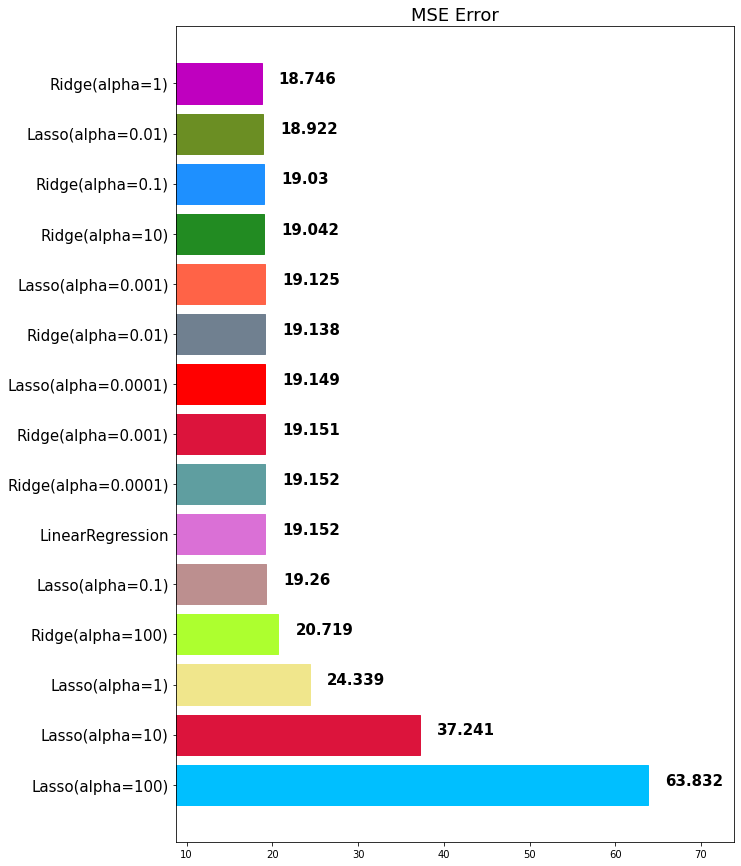

Lasso(alpha=0.0001 Train score : 0.7300859058186057 Valid score : 0.7676904082308065


In [38]:
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_valid)
    mse_eval(f'Lasso(alpha={alpha})', pred, y_valid)

    train_score = lasso.score(x_train, y_train)
    valid_score = lasso.score(x_valid, y_valid)

    print(f'Lasso(alpha={alpha} Train score : {train_score} Valid score : {valid_score}')

선형모델은 빠르고 feature가 많을 수록 성능이 좋아진다

In [39]:
lasso100 = Lasso(alpha=100)
lasso100.fit(x_train, y_train)
lasso100_pred = lasso100.predict(x_valid)

lasso001 = Lasso(alpha=0.001)
lasso001.fit(x_train, y_train)
lasso001.pred = lasso001.predict(x_valid)

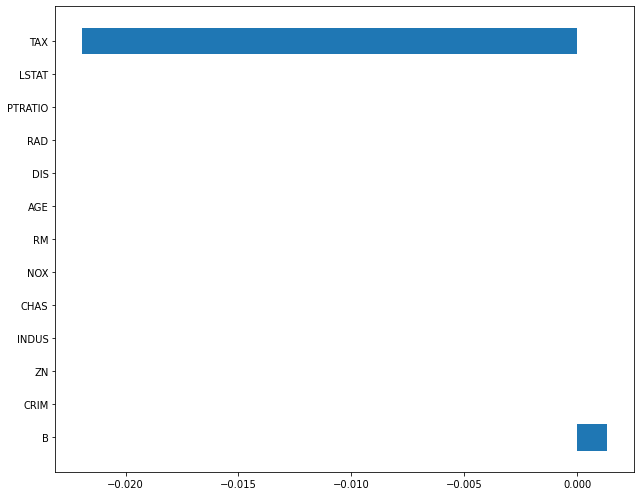

In [40]:
plot_coef(x_train.columns, lasso100.coef_)
# 아래 나머지 값은 전부 0

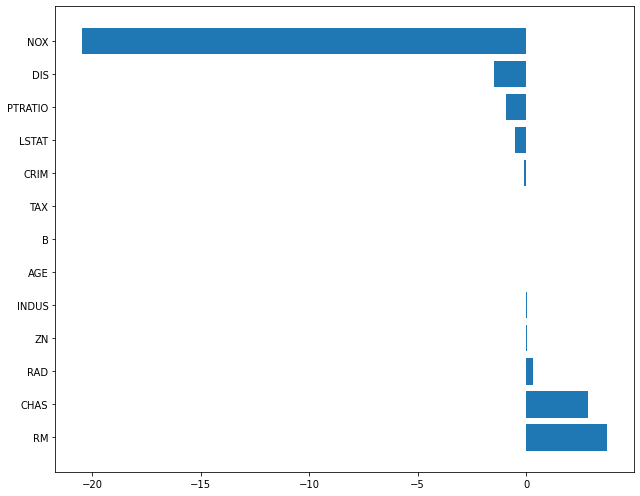

In [41]:
plot_coef(x_train.columns, lasso001.coef_)
# 조금 늘었다....????

# ElasticNet
릿지와 라쏘는 동시에 적용시키는 것 각자의 장점만 적용
* Ridge와 Lasso의 규제 방식을 같이 사용
* 11_ratio ( default = 0.5 , 릿지와 라쏘 반반)
 - l1_ratio = 0 ( L2 만 사용 )
 - l1_ratio = 1 ( L1 만 사용 )
 - 0 l1_ratio < 1 (L1과 L2의 혼합사용)

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
ratios = [0.2, 0.5, 0.8]

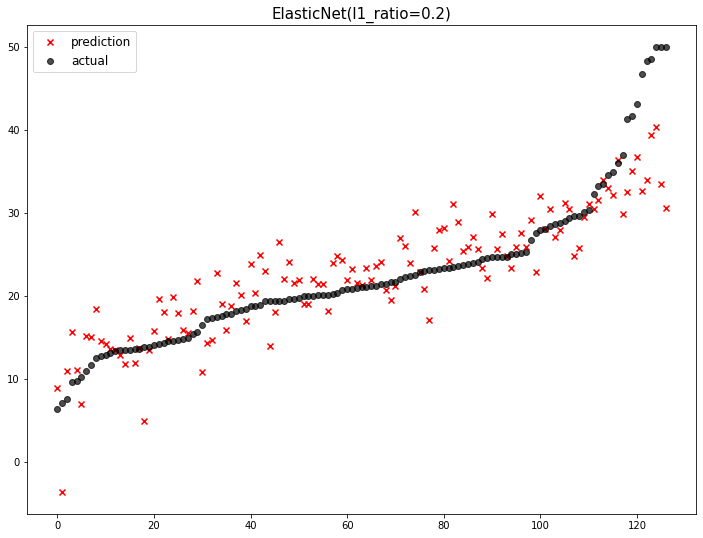

                       model        mse
0           Lasso(alpha=100)  63.832240
1            Lasso(alpha=10)  37.241495
2             Lasso(alpha=1)  24.339263
3   ElasticNet(l1_ratio=0.2)  21.793609
4           Ridge(alpha=100)  20.719235
5           Lasso(alpha=0.1)  19.260224
6           LinearRegression  19.152220
7        Ridge(alpha=0.0001)  19.152075
8         Ridge(alpha=0.001)  19.150770
9        Lasso(alpha=0.0001)  19.149451
10         Ridge(alpha=0.01)  19.137950
11        Lasso(alpha=0.001)  19.124950
12           Ridge(alpha=10)  19.041955
13          Ridge(alpha=0.1)  19.029929
14         Lasso(alpha=0.01)  18.922254
15            Ridge(alpha=1)  18.745782


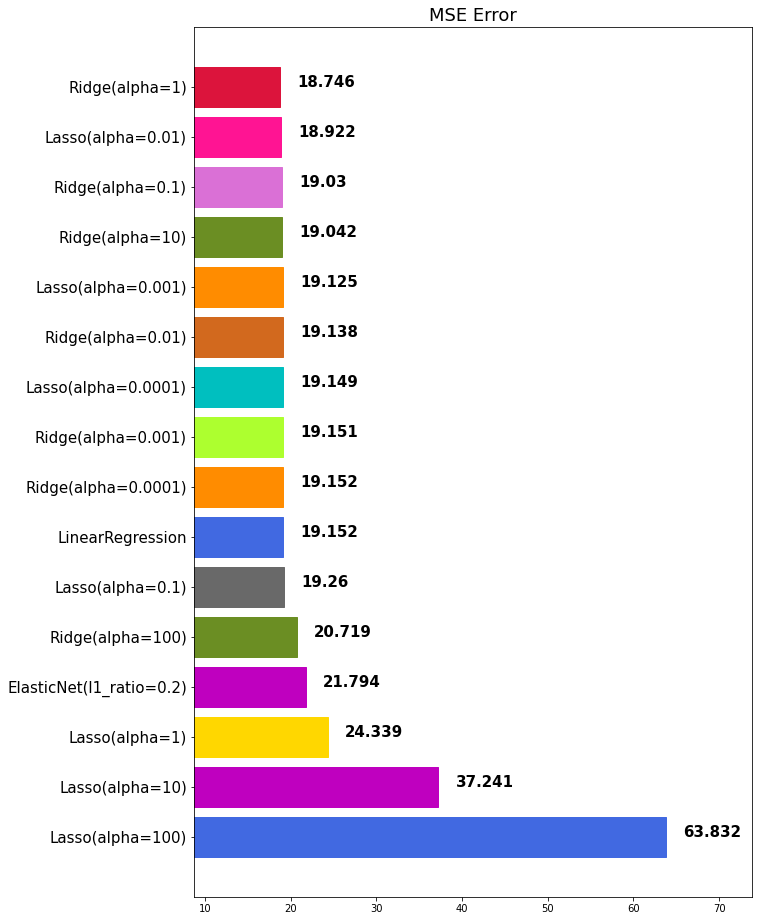

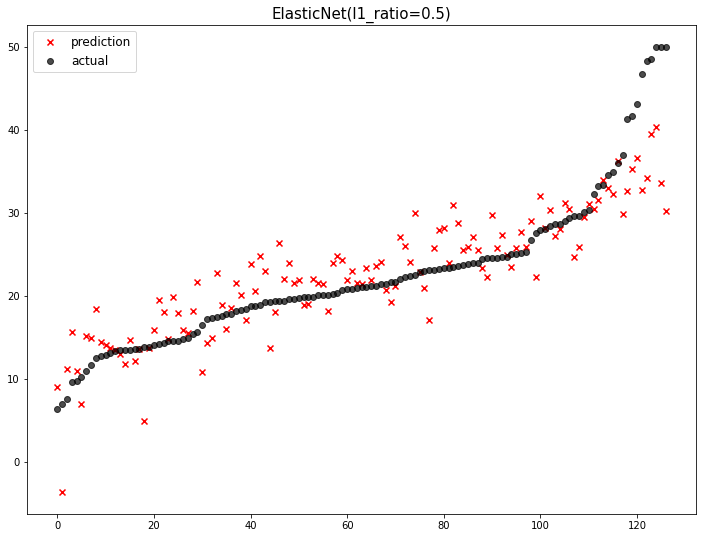

                       model        mse
0           Lasso(alpha=100)  63.832240
1            Lasso(alpha=10)  37.241495
2             Lasso(alpha=1)  24.339263
3   ElasticNet(l1_ratio=0.2)  21.793609
4   ElasticNet(l1_ratio=0.5)  21.627718
5           Ridge(alpha=100)  20.719235
6           Lasso(alpha=0.1)  19.260224
7           LinearRegression  19.152220
8        Ridge(alpha=0.0001)  19.152075
9         Ridge(alpha=0.001)  19.150770
10       Lasso(alpha=0.0001)  19.149451
11         Ridge(alpha=0.01)  19.137950
12        Lasso(alpha=0.001)  19.124950
13           Ridge(alpha=10)  19.041955
14          Ridge(alpha=0.1)  19.029929
15         Lasso(alpha=0.01)  18.922254
16            Ridge(alpha=1)  18.745782


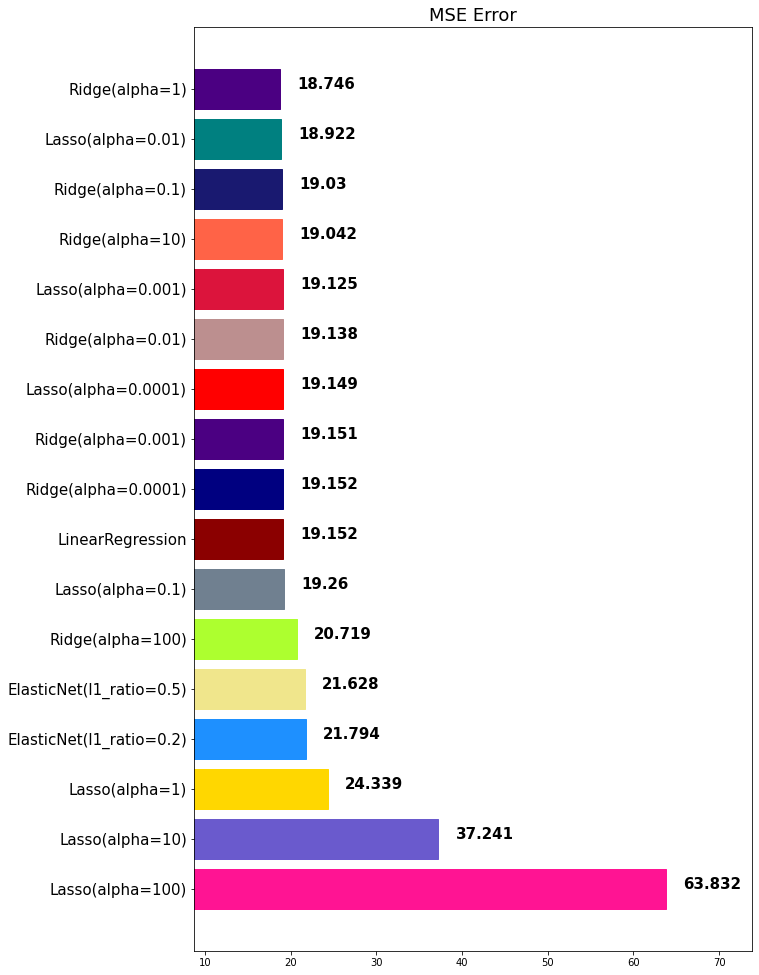

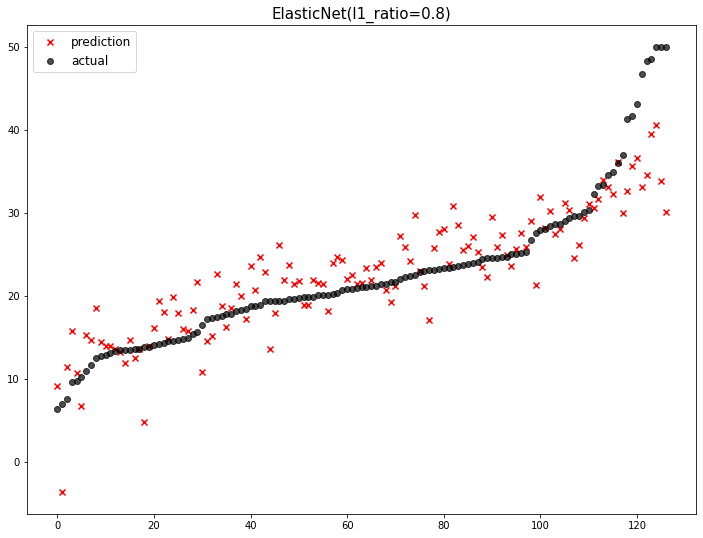

                       model        mse
0           Lasso(alpha=100)  63.832240
1            Lasso(alpha=10)  37.241495
2             Lasso(alpha=1)  24.339263
3   ElasticNet(l1_ratio=0.2)  21.793609
4   ElasticNet(l1_ratio=0.5)  21.627718
5   ElasticNet(l1_ratio=0.8)  21.263785
6           Ridge(alpha=100)  20.719235
7           Lasso(alpha=0.1)  19.260224
8           LinearRegression  19.152220
9        Ridge(alpha=0.0001)  19.152075
10        Ridge(alpha=0.001)  19.150770
11       Lasso(alpha=0.0001)  19.149451
12         Ridge(alpha=0.01)  19.137950
13        Lasso(alpha=0.001)  19.124950
14           Ridge(alpha=10)  19.041955
15          Ridge(alpha=0.1)  19.029929
16         Lasso(alpha=0.01)  18.922254
17            Ridge(alpha=1)  18.745782


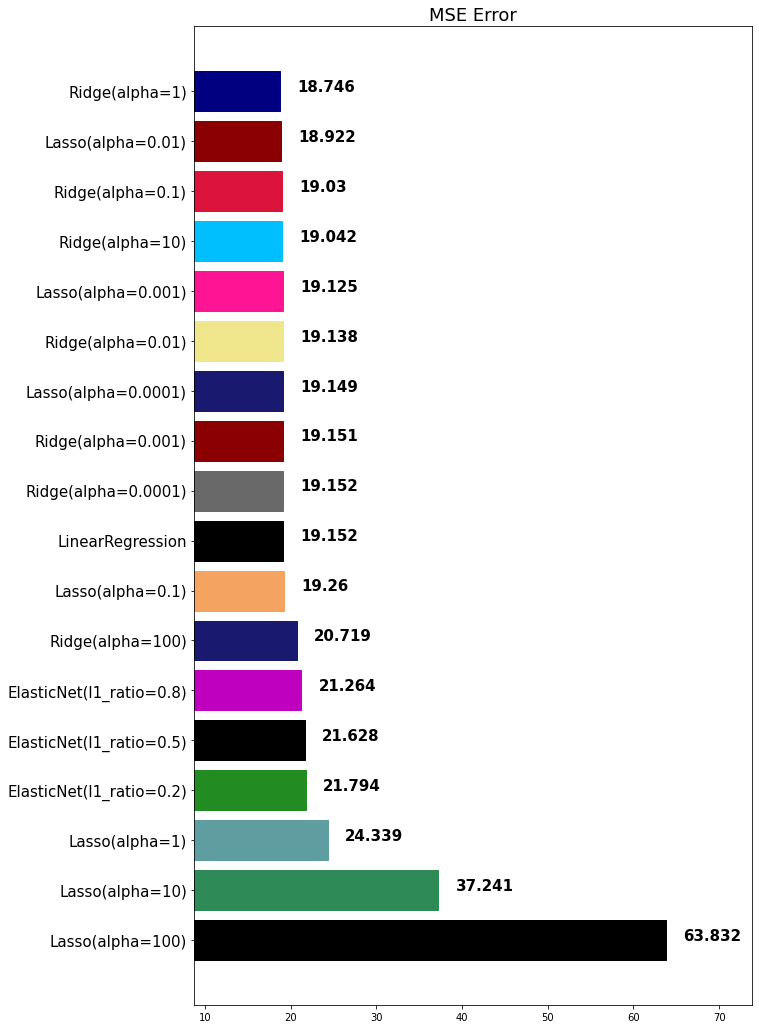

In [44]:
for ratio in ratios:
    elastic_net = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elastic_net.fit(x_train, y_train)

    pred = elastic_net.predict(x_valid)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_valid)

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [46]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.755425,10.981530,11.155541,0.068602,0.554036,6.280132,68.675198,3.772857,9.430079,408.715040,18.455673,360.013034,12.614248
std,9.200280,22.631326,6.870775,0.253110,0.114163,0.709230,28.077466,2.120138,8.667414,167.283519,2.156408,85.361063,7.097095
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.079960,0.000000,5.130000,0.000000,0.449000,5.877500,45.500000,2.082850,4.000000,279.000000,17.400000,376.075000,6.925000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.193000,77.700000,3.152300,5.000000,334.000000,18.900000,391.710000,11.500000
75%,3.521480,12.500000,18.100000,0.000000,0.624000,6.599500,93.850000,5.164300,24.000000,666.000000,20.200000,396.220000,16.820000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## StandardScaler(표준화)

평균을 0, 표준편차를 1로 만들어주는 스케일러

In [47]:
std_scaler = StandardScaler()
x_train_std_scaled = std_scaler.fit_transform(x_train)

round(pd.DataFrame(x_train_std_scaled).describe(), 2) #라운드는 소수점 2쨰자리까지 나타내줌

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-0.49,-1.56,-0.27,-1.45,-3.41,-2.35,-1.25,-0.97,-1.33,-2.72,-4.22,-1.54
25%,-0.40,-0.49,-0.88,-0.27,-0.92,-0.57,-0.83,-0.80,-0.63,-0.78,-0.49,0.19,-0.80
50%,-0.38,-0.49,-0.21,-0.27,-0.14,-0.12,0.32,-0.29,-0.51,-0.45,0.21,0.37,-0.16
75%,-0.03,0.07,1.01,-0.27,0.61,0.45,0.90,0.66,1.68,1.54,0.81,0.42,0.59
max,9.28,3.94,2.42,3.68,2.78,3.53,1.12,3.95,1.68,1.81,1.65,0.43,3.58


## MinMaxScaler (정규화)
최소값을 0으로 최대값을 1로 정규화

- 최소값과 최대값이 항상 있으면 이 스케일러를 사용하는 것이 좋다

In [49]:
minmax_scaler = MinMaxScaler()
x_train_minmax_scaled = minmax_scaler.fit_transform(x_train)

In [51]:
round(pd.DataFrame(x_train_minmax_scaled).describe(), 2) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.11,0.39,0.07,0.34,0.49,0.68,0.24,0.37,0.42,0.62,0.91,0.30
std,0.10,0.23,0.25,0.25,0.24,0.14,0.29,0.19,0.38,0.32,0.23,0.22,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.12,0.41,0.44,0.09,0.13,0.18,0.51,0.95,0.14
50%,0.00,0.00,0.34,0.00,0.31,0.47,0.77,0.18,0.17,0.28,0.67,0.99,0.27
75%,0.04,0.12,0.65,0.00,0.49,0.56,0.94,0.37,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## RobustScaler
* 중앙값을 0으로 만든다
* IQR(Inter Quantile Range)을 1로 변환

- 아웃라이어는 아웃라이어로 처리, 중앙값의 밖으로 처리????

In [52]:
robust_scaler = RobustScaler()
x_train_robust_scaled = robust_scaler.fit_transform(x_train)

In [54]:
round(pd.DataFrame(x_train_robust_scaled).describe(), 2) # 가운데로 값을 몰아준다>?>??
#아웃라이엉 처리에 특화되어있다

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,1.02,0.88,0.11,0.07,0.09,0.12,-0.19,0.20,0.22,0.19,-0.16,-1.57,0.11
std,2.67,1.81,0.53,0.25,0.65,0.98,0.58,0.69,0.43,0.43,0.77,4.24,0.72
min,-0.07,0.00,-0.71,0.00,-0.85,-3.23,-1.55,-0.66,-0.20,-0.38,-2.25,-19.43,-0.99
25%,-0.05,0.00,-0.35,0.00,-0.51,-0.44,-0.67,-0.35,-0.05,-0.14,-0.54,-0.78,-0.46
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.95,1.00,0.65,0.00,0.49,0.56,0.33,0.65,0.95,0.86,0.46,0.22,0.54
max,25.78,8.00,1.39,1.00,1.90,3.58,0.46,2.91,0.95,0.97,1.11,0.26,2.68
